### Importing the dependencies and text preprocessing modules:

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sqlite3    
import pickle    
import time

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

### Reading the cleaned sqlite file. 
###### (cleanning process show in previous file.)

In [24]:
conn = sqlite3.connect('C:\\Users\\HP\\Desktop\\GRE\\ML\\final.sqlite')
final = pd.read_sql_query("""SELECT * FROM Reviews""", conn)
conn.close()
final.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought sever vital can dog food product found ...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arriv label jumbo salt peanut peanut a...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,confect around centuri light pillowi citrus ge...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,look secret ingredi robitussin believ found go...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffi great price wide assort yummi taff...


In [25]:
data = final[['Score', 'Time', 'CleanedText']].copy()
data.sort_values('Time', inplace = True) ##inplace parameter performs the time operation in the same variable and updates it instead of creating a new variable.
data.head(10)

,Score,Time,CleanedText
117879,1,939340800,witti littl book make son laugh loud recit car...
117856,1,940809600,rememb see show air televis year ago child sis...
298565,1,944092800,beetlejuic well written movi everyth excel act...
169198,1,944438400,twist rumplestiskin captur film star michael k...
298564,1,946857600,beetlejuic excel funni movi keaton hilari wack...
169259,1,947376000,one movi movi collect fill comedi action whate...
169184,0,948240000,alway enjoy movi funni entertain hesit pick cl...
63292,1,948672000,bought apart infest fruit fli hour trap quot a...
169284,1,951523200,happen say name three time michael keaten star...
298566,1,959990400,get crazi realli imposs today find french vhs ...


### Unbalanced dataset:
(can be balanced by upsampling the negative datapoints.)

In [4]:
data['Score'].value_counts()

1    306779
0     57078
Name: Score, dtype: int64

### Deleting the final variable inorder to empty space:

In [5]:
del final

### Separating the target variable from the features.

In [6]:
x = data['CleanedText']
y = data['Score']

### Splitting the training and testing data:
(70:30 ratio)

In [7]:
x_train_raw, x_test_raw, y_train, y_test = train_test_split(x, y, test_size = 0.3, shuffle = False )

In [8]:
x_train_raw.shape, y_train.shape, x_test_raw.shape, y_test.shape

((254699,), (254699,), (109158,), (109158,))

In [9]:
x_train_raw.values

array(['witti littl book make son laugh loud recit car drive along alway sing refrain learn whale india droop rose love new word book introduc silli classic book will bet son still abl recit memori colleg',
       'rememb see show air televis year ago child sister later bought day thirti someth use seri book amp song student teach preschool amp turn whole school purchas along book children amp tradit live',
       'beetlejuic well written movi everyth excel act special effect delight chose view movi',
       ..., 'excel sift coffe tea find want open drawer look handi',
       'flavor coffe person wife dunkin donut alway mock order sweet sugari coffe think better sugar rush caffein rush time bought wife keurig probabl tire hear shtick everi time went coffe set tri differ flavor see sort delici await made batch donut hous collect coffe chocol glaze donut cup portion pack keurig cup brewer count bare came close throw unus cup sever time tast pod bad like drink big cup chemic chemic bare t

### Applying Count BOW text preprocessing technique on training data:

In [10]:
bow = CountVectorizer()
x_train = bow.fit_transform(x_train_raw.values)

In [11]:
x_train.shape 

(254699, 63242)

### Applying BOW vectorizer text preprocessing technique on testing data:

In [12]:
x_test = bow.transform(x_test_raw.values)

In [13]:
x_test.shape

(109158, 63242)

### Standardizing  features by removing the mean and scaling to unit variance:

In [14]:
s = StandardScaler(with_mean=False) 

x_train= s.fit_transform(x_train)

x_test = s.transform(x_test)

D:\python\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Performing cross validation to find the optimum value of alpha:

In [15]:
start = time.time()
c = np.linspace(1,10,10)

cv_scores = [] 

for a in c:
    clf = LogisticRegression(C= a , class_weight = "balanced")
    scores = cross_val_score(clf, x_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

cv_error = [1 - x for x in cv_scores]

optimal_c = c[cv_error.index(min(cv_error))]
print('\nThe optimal alpha is', optimal_c)

end = time.time()
print("Total time in minutes = ", (end-start)/60)


The optimal alpha is 1.0
Total time in minutes =  348.088606329759


### Plotting the optimum value of alpha:

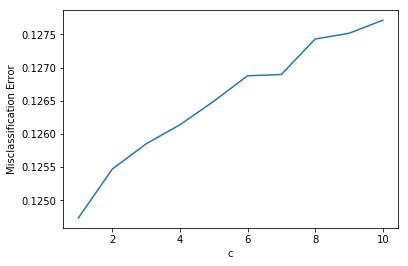

In [16]:
plt.plot(c, cv_error)
plt.xlabel('c')
plt.ylabel('Misclassification Error')
plt.show()

### Displaying the output prediction using optimum value of alpha:

In [17]:
clf =LogisticRegression(C = optimal_c)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 88.95637516260832


array([[11936,  7130],
       [ 4925, 85167]], dtype=int64)

### Feature extraction :

In [20]:
idx = (-abs(clf.coef_)).argsort()[:2,:50]
print("Top 50 features")
for i in idx[0]:
    print(bow.get_feature_names()[i])
           

Top 50 features
great
best
love
delici
marmit
perfect
muir
good
glen
excel
radius
oomph
ibrik
tijuana
nice
steadili
disappoint
beetlejuic
chimp
pamper
favorit
acv
amaz
tasti
hestit
http
patrick
ricotta
nom
worst
brass
mic
awesom
noir
propion
palmit
yum
daddi
tast
easi
wonder
hook
addict
reb
biscoff
stave
inflammatori
washabl
mph
terribl
